In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf
from keras.layers import Dense,Dropout,Flatten
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
df=pd.read_csv('/content/Alphabets_data.csv')
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [ ]:
print(df.shape)
print(df.columns)

(20000, 17)
Index(['letter', 'xbox', 'ybox', 'width', 'height', 'onpix', 'xbar', 'ybar',
       'x2bar', 'y2bar', 'xybar', 'x2ybar', 'xy2bar', 'xedge', 'xedgey',
       'yedge', 'yedgex'],
      dtype='object')


In [ ]:
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000
mean,4.023550,7.035500,5.121850,5.37245,3.505850,6.897600,7.500450,4.628600,5.178650,8.282050,6.45400,7.929000,3.046100,8.338850,3.691750,7.80120
std,1.913212,3.304555,2.014573,2.26139,2.190458,2.026035,2.325354,2.699968,2.380823,2.488475,2.63107,2.080619,2.332541,1.546722,2.567073,1.61747
min,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,3.000000,5.000000,4.000000,4.00000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.00000,7.000000,1.000000,8.000000,2.000000,7.00000
50%,4.000000,7.000000,5.000000,6.00000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.00000,8.000000,3.000000,8.000000,3.000000,8.00000
75%,5.000000,9.000000,6.000000,7.00000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.00000,9.000000,4.000000,9.000000,5.000000,9.00000
max,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.00000,15.000000,15.000000,15.000000,15.000000,15.00000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [ ]:
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [ ]:
df.duplicated().sum()

np.int64(1332)

In [ ]:
df.drop_duplicates(inplace=True)

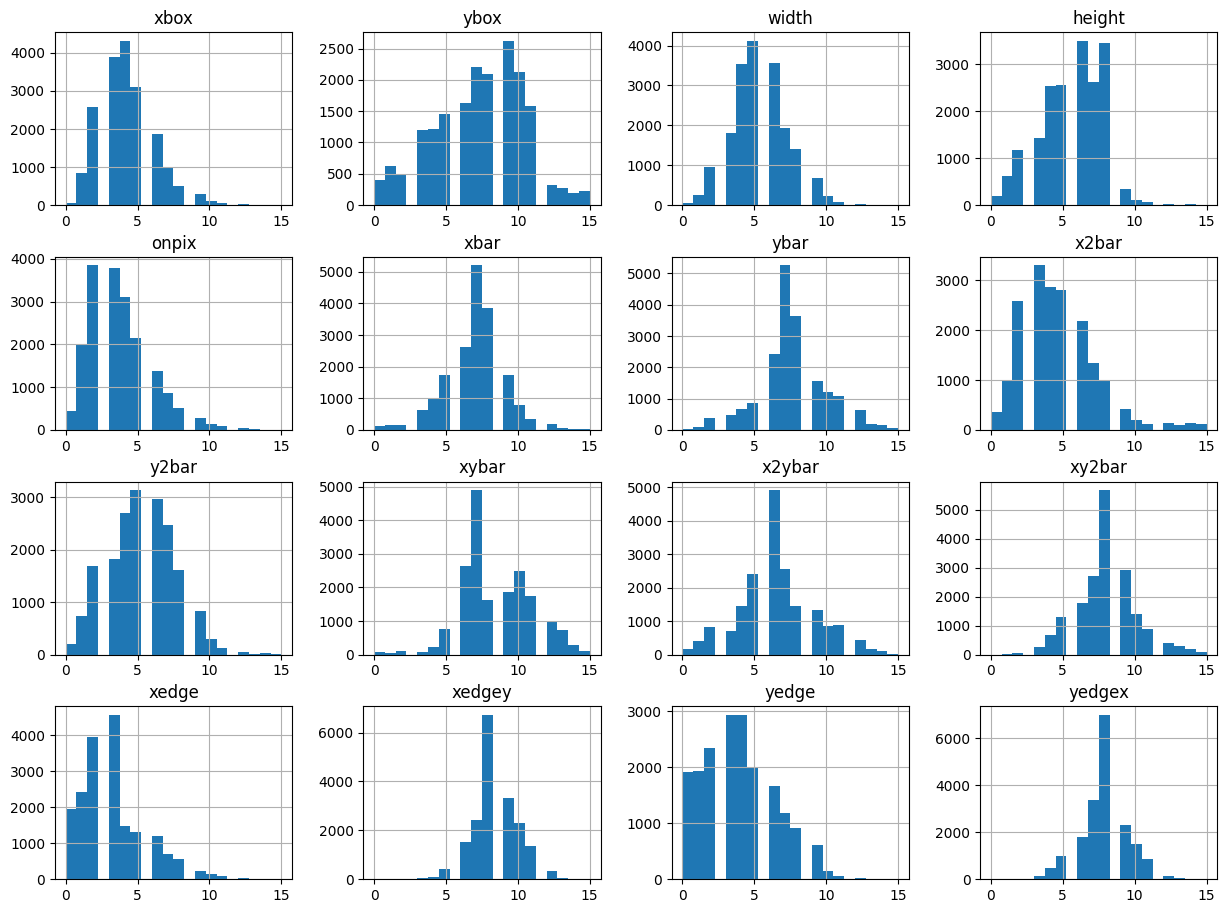

In [ ]:
df.hist(bins=20,figsize=(15,11))
plt.show()

In [ ]:
le=LabelEncoder()

In [ ]:
df['letter']=le.fit_transform(df['letter'])

In [ ]:
features=df.drop('letter',axis=1)
target=df['letter']

In [ ]:
se=StandardScaler()
se.fit_transform(features)

array([[-1.14441743,  0.23706997, -1.17829391, ..., -0.22341228,
        -1.4947118 ,  0.13009585],
       [ 0.45185548,  1.49194265, -1.17829391, ..., -0.22341228,
         0.07996539,  1.33686814],
       [-0.08023549,  1.17822448,  0.37216713, ..., -0.8584093 ,
        -0.3137039 ,  0.73348199],
       ...,
       [ 1.51603743,  0.86450631,  1.40580782, ...,  0.41158474,
        -0.3137039 , -0.4732903 ],
       [ 0.98394646,  0.55078814,  0.37216713, ...,  2.3165758 ,
        -0.7073732 , -2.28344875],
       [-0.08023549,  0.55078814,  0.37216713, ..., -0.8584093 ,
        -0.7073732 ,  0.13009585]])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
model=Sequential([
    Dense(64,activation='relu',input_shape=(x_train.shape[1],)),
    Dense(32,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,validation_split=0.33,epochs=20,batch_size=20)

Epoch 1/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.0372 - loss: -34937.3594 - val_accuracy: 0.0369 - val_loss: -633765.2500
Epoch 2/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0356 - loss: -1416644.6250 - val_accuracy: 0.0369 - val_loss: -5289797.0000
Epoch 3/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0398 - loss: -7719567.5000 - val_accuracy: 0.0369 - val_loss: -16595805.0000
Epoch 4/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0411 - loss: -21095426.0000 - val_accuracy: 0.0369 - val_loss: -36234536.0000
Epoch 5/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.0393 - loss: -42989792.0000 - val_accuracy: 0.0369 - val_loss: -65158668.0000
Epoch 6/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0399 - loss: -73607392.0000 - val_accuracy: 0.0369 - val_loss: -104038120.0000
Epoch 7/20
501/501 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0406 - loss: -117608432.0000 - val_accuracy: 0.0369 - val_loss: -153510352.00

In [ ]:
score=model.evaluate(x_train,y_train)

467/467 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0399 - loss: -2038950784.0000


In [ ]:
score

[-2033614592.0, 0.03843578323721886]

**Hyperparameter Tuning**

In [ ]:
!pip install tensorflow keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.5 MB/s eta 0:00:00


In [32]:
import tensorflow as tf
from kerastuner import RandomSearch

def build_model(hp):
  model=Sequential()
  model.add(Dense(units=hp.Int('units1', min_value=32, max_value=128, step=16), activation='relu', input_shape=(x_train.shape[1],)))
  model.add(Dense(units=hp.Int('units2', min_value=16, max_value=64, step=16), activation='relu'))
  model.add(Dense(1,activation='sigmoid'))

  model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [34]:
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='my_dir', project_name='alphabet_tuning')

tuner.search(x_train, y_train, epochs=50, validation_split=0.2)

Trial 5 Complete [00h 05m 55s]
val_accuracy: 0.03716102987527847

Best val_accuracy So Far: 0.03716102987527847
Total elapsed time: 00h 28m 30s


In [35]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"Best units1: {best_hps.get('units1')}, Best units2: {best_hps.get('units2')}, Best learning_rate: {best_hps.get('learning_rate')}")

Best units1: 64, Best units2: 32, Best learning_rate: 0.0001


In [36]:
best_model = tuner.hypermodel.build(best_hps)

In [37]:

best_model.fit(x_train, y_train, epochs=50, validation_split=0.2, batch_size=32)

Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.0393 - loss: 0.0000e+00 - val_accuracy: 0.0372 - val_loss: 0.0000e+00
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0410 - loss: 0.0000e+00 - val_accuracy: 0.0372 - val_loss: 0.0000e+00
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.0389 - loss: 0.0000e+00 - val_accuracy: 0.0372 - val_loss: 0.0000e+00
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.0407 - loss: 0.0000e+00 - val_accuracy: 0.0372 - val_loss: 0.0000e+00
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.0377 - loss: 0.0000e+00 - val_accuracy: 0.0372 - val_loss: 0.0000e+00
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.0405 - loss: 0.0000e+00 - val_accuracy: 0.0372 - val_loss: 0.0000e+00
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0388 - loss: 0.0000e+00 - val_accuracy: 0.0372 - val_loss: 0.0000e+00
Epoch 8/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/s

**Evaluation**

In [38]:
test_loss, test_accuracy = best_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_accuracy}')

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.0388 - loss: 0.0000e+00
Test Accuracy: 0.04177825525403023
